In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import scatter, plot, title, show, xlabel, ylabel
import math

#Linear Regression w/ One Variable

First step is to load your data and plot it

   number_of_beers  level_of_drunkenness
0        32.502345             31.707006
1        53.426804             68.777596
2        61.530358             62.562382
3        47.475640             71.546632
4        59.813208             87.230925
5        55.142188             78.211518
6        52.211797             79.641973
7        39.299567             59.171489
8        48.105042             75.331242
9        52.550014             71.300880


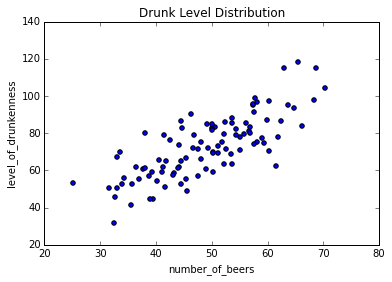

In [148]:
data = pd.read_csv('randomdata.csv')
print data.head(10)
data.plot(kind='scatter', x='number_of_beers', y='level_of_drunkenness', title='Drunk Level Distribution');

Obviously the above scenario is quite rediculous and by far unrealistic. That being said, the concepts explained here still apply.

In [149]:
y = data['level_of_drunkenness']
x1 = data['number_of_beers']

get number of training examples

In [150]:
num_of_observations = y.size
print num_of_observations

100


<h3>Equation of a line</h3>

$y = \theta_0 x_0 + \theta_1 x_1$

Note that the first term is the y-intercept

Now let's vectorize y values

In [151]:
y = y.as_matrix().reshape(y.size, 1)
print y[0:10]

[[ 31.70700585]
 [ 68.77759598]
 [ 62.5623823 ]
 [ 71.54663223]
 [ 87.23092513]
 [ 78.21151827]
 [ 79.64197305]
 [ 59.17148932]
 [ 75.3312423 ]
 [ 71.30087989]]


Add a column of ones to x1 (this is the coefficient for your y-intercept)

In [142]:
x1_with_yintercept = np.ones(shape=(num_of_observations, 2))
x1_with_yintercept[:, 1] = x1
print x1_with_yintercept[0:10]

[[  1.          32.50234527]
 [  1.          53.42680403]
 [  1.          61.53035803]
 [  1.          47.47563963]
 [  1.          59.81320787]
 [  1.          55.14218841]
 [  1.          52.21179669]
 [  1.          39.29956669]
 [  1.          48.10504169]
 [  1.          52.55001444]]


We'll want to use the Normal Equation if our number of observations is less than 10,000. Otherwise, we'd want to use gradient Descent to find the most optimal coefficients. Since our number of observation is 0, let's use the Normal Equation.

<h3> Normal Equation </h3>

$\theta = (X^T X)^{-1} X^T y$

In [143]:
def normal_equation(X, y):
    theta = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
    return theta
theta = normal_equation(x1_with_yintercept, y)
print theta

[[ 7.99102098]
 [ 1.32243102]]


The first number above represents the coefficient for the y-intercept. The second number is the coefficient for the slope (x1).

<h3> Our Results </h3>

In [144]:
yHat = x1_with_yintercept.dot(theta).flatten()
print yHat

[  50.97313068   78.64428408   89.36067528   70.77427966   87.08986264
   80.9127616    77.03752068   59.96198716   71.60662047   77.48479033
   68.05548117   79.86730909   66.39493013   84.9148112    83.00884075
   72.73180677   67.0867556    87.7300766    68.31853072   59.3235847
   95.52248785   94.4992372    70.78164424   62.97194057   76.55270453
   86.50483786   83.77954744   92.11821271   69.79829882   74.84884901
   77.05365354   55.02702285   64.11033459   84.90961325   84.03668646
   68.0829885    89.84450605   51.75533073   56.17513031   57.81447577
   66.91273975   65.27646179   74.20930217   66.00688013   91.30084388
   51.19357794   61.10897432   78.84036556   52.77410942   93.56174855
   58.40185886   66.84255791   61.68111005   63.16373769   75.55221639
   80.82800368   62.7102102    90.63594762   73.05976831   62.34648699
   62.45139666   74.35905937   77.25790319   74.29174233   52.48382396
   60.30361675   82.21958847   83.84837825   87.69289981   55.17283917
   49.7

Let's make sure all our data is in the same format, the plot our linear regression model.

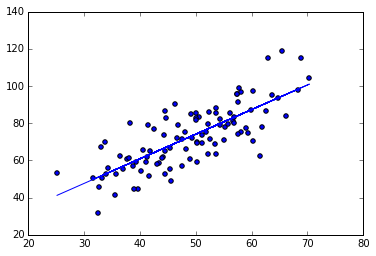

In [145]:
y = np.array(y).reshape(y.size, 1).flatten()
x1 = np.array(x1)
yHat = np.array(yHat).reshape(yHat.size, 1).flatten()

scatter(x1, y, marker='o', c='b')
plt.plot(x1, yHat.flatten())
plt.show()

The line in the above graph looks like it fits the data points pretty well.
Let's try making a prediction given the coefficients we found (our theta values).
What would our level of drunkenness be if we had 70 beers?

In [146]:
print np.array([1, 70]).dot(theta)

[ 100.56119258]


Wow, 100.56 must be a pretty high drunken level. Maybe drinking 70 beers at once isn't such a good idea after all.

#Linear Regression w/ Multiple Variables

Let's say we have some housing data.

In [2]:
housing_data = pd.read_csv('housingdata.csv')
print housing_data.info()
print housing_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 3 columns):
square_footage     47 non-null int64
num_of_bedrooms    47 non-null int64
price              47 non-null int64
dtypes: int64(3)
memory usage: 1.5 KB
None
   square_footage  num_of_bedrooms   price
0            2104                3  399900
1            1600                3  329900
2            2400                3  369000
3            1416                2  232000
4            3000                4  539900
5            1985                4  299900
6            1534                3  314900
7            1427                3  198999
8            1380                3  212000
9            1494                3  242500


Since we have more than one variable this time, our line equation now looks something like this:

$y = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2$

Let's plot this - our plot will have to be 3d since we're dealing with more than 2-dimensional space.

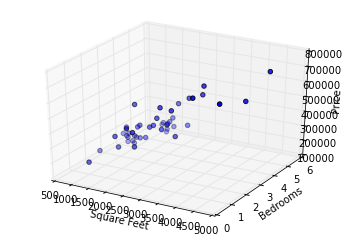

In [3]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(housing_data['square_footage'], housing_data['num_of_bedrooms'], housing_data['price'])
threedee.set_xlabel('Square Feet')
threedee.set_ylabel('Bedrooms')
threedee.set_zlabel('Price')
plt.show()

Looks like there's a linear relationship between the dependent and independent variables.
Our goal is to predict the price of the house given the size of the house and the number of bedrooms it has.

In [4]:
y = housing_data['price']
x1 = housing_data['square_footage']
x2 = housing_data['num_of_bedrooms']
features = pd.DataFrame(housing_data[['square_footage', 'num_of_bedrooms']])

Get number of training examples.

In [5]:
num_of_observations = y.size
print num_of_observations

47


Let's vectorize our y values (i.e. our target variable)

In [6]:
y = y.as_matrix().reshape(y.size, 1)
print y[0:10]

[[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]]


Although there's only 47 observations and we could technically use the Normal Equation, let's use another technique meant for observations that are > 10,000 called "Gradient Descent".

<h3>Gradient Descent</3>

Let's ignore the fact that we're working with multiple independent variables and image our first example for a moment where we only had one variable to consider.

Gradient Descent is an interative technique used to find the optimal coefficient values. If we chose random coefficients for our independent variables, we might get a really inaccurate prediction like in the graph below.
<img src="http://www.mrdataminer.com/wp-content/uploads/2015/05/figure_1-300x224.png">

Obviously we missed the mark. A good way to fit this line a little better is to determine an error metric we'd like to use to see how our line compares to our data points; obviously the smaller the error, the better. We can do this using the Mean Squared Error function:

$MSE(\theta) = \frac{1}{N}\sum\limits_{i=1}^N(h_\theta (x^i) - y^i)^2$ where $\theta$ is a vector of coefficients and $i$ is the ith training example

Let's plot a range of potential $\theta$ values along with their errors.
<img src="http://d1u2s20mo6at4b.cloudfront.net/wp-content/uploads/gradient_descent_error_surface.png" width="50%", height="50%">

As you can see, we'd ideally like to find two values where our error is at its smallest. It seems the error is "minimized" at the bottom of these two graphs. So if we just choose a random place to start and start moving downhill, eventually we'll get to the bottom which is where we'd like to be.

So how do we start moving toward the bottom of the graph? This is achieved using a bit of calculus. If we take the partial derivative of our Mean Squared Error function, we'll get direction values for our independent variables. If those values are negative (which means their slopes are negative) we're looking downhill, which is good! Below is the partial derivative of the MSE function.

$\frac{\delta}{\delta \theta_j} = \frac{2}{N}\sum\limits_{i=1}^N x_j^i(h_\theta(x^i) - y^i)$

In order to iteratively move downhill, we use the gradient descent algorithm and repeat this until convergence.

$\theta_j = \theta_j - \alpha \frac{\delta}{\delta \theta_j} MSE(\theta)$ where $\alpha$ is the learning rate or step size

Convergence happens when there's not much change in error (i.e. the MSE function) after each iteration. Typically if the change in error is < 0.001, we can say the process has converged.

Before we start, we'll need to make sure we scale all our independent variables. There's a few orders of magnitude of difference between the number of bedrooms and the square_footage. To scale the variables, we can use "z-score normalization":
<h4>Z-Score Normalization</h4>
<ol>
    <li> subtract mean value of each feature from the dataset </li>
    <li> divide the above by that feature's value's standard deviation. </li>
</ol>

Let's write some code for it now!

In [7]:
def normalize_features(features):
    num_of_columns = features.shape[1]
    column_names = features.columns.values

    mean_of_features = []
    std_deviation_of_features = []

    normalized_features = pd.DataFrame()

    for column in range(num_of_columns):
        mean = features.ix[:, column].mean()
        mean_of_features.append(mean)
        std_deviation = features.ix[:, column].std()
        std_deviation_of_features.append(std_deviation)
        normalized_features[column_names[column]] = (features.ix[:, column] - mean) / std_deviation

    return normalized_features, mean_of_features, std_deviation_of_features

normalized_features, mean_of_features, std_deviation_of_features = normalize_features(features)

Ok, now we've got our features scaled. Let's add ones to our y-intercept independent variable.

In [8]:
normalized_features.shape
normalized_features_with_yintercept = np.ones(shape=(num_of_observations, normalized_features.shape[1] + 1))
# overlay our features on the matrix of ones we created above
normalized_features_with_yintercept[:, 1:normalized_features.shape[1] + 1] = normalized_features
print normalized_features_with_yintercept[0:10]

[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]
 [ 1.         -0.01973173  1.09041654]
 [ 1.         -0.5872398  -0.22367519]
 [ 1.         -0.7218814  -0.22367519]
 [ 1.         -0.78102304 -0.22367519]
 [ 1.         -0.63757311 -0.22367519]]


Initialize the learning rate.

In [9]:
alpha = 0.01

Initialize theta (coefficient) values by just setting them equal to 0 and make it a vector.

In [10]:
theta = np.zeros(shape=(normalized_features_with_yintercept.shape[1], 1))

Now that we've normalized our features and initialized our alpha and theta, we're ready to run the gradient descent algorithm.

The following gradient descent algorithm has been tweaked a little. A constant learning rate will indeed get us to a point of convergence assuming we pick a good learning rate. If our MSE value doesn't increase on every iteration, we need to make alpha smaller but not too small, otherwise convergence can be really slow. A good idea is to consider this list of alpha values -> [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1] and find a value that's too small and too large, and choose a value that's slightly smaller than the value that was too large.

In [11]:
def compute_error(features, y, theta):
    num_of_observations = y.size
    yHat = features.dot(theta)
    errors = (yHat - y)
    mse = (1.0 / num_of_observations) * errors.T.dot(errors)
    return mse

def gradient_descent(features, y, theta, alpha):
    # some initializations
    num_of_observations = y.size
    mse_history = {}
    num_of_iterations = 0
    decrease_alpha = False
    converged = False

    # batch gradient descent (great for convex or relatively smooth manifolds)
    while not converged:
        num_of_iterations += 1
        yHat = features.dot(theta)
        theta_size = theta.size
        for theta_index in range(theta_size):
            # get all training examples for that one feature
            feature_examples = features[:, theta_index]
            feature_examples.shape = (num_of_observations, 1)
            # calculate partial derivative of MSE function given the current feature
            partial_derivative = (2.0 / num_of_observations) * sum((yHat - y) * feature_examples)
            # update theta via gradient descent
            theta[theta_index][0] = theta[theta_index][0] - alpha * partial_derivative
        # update MSE history with each iteration
        mse_history[num_of_iterations] = compute_error(features, y, theta)
        current_error = mse_history[num_of_iterations]
        if num_of_iterations == 1:
            previous_error = 0
        else:
            previous_error = mse_history[num_of_iterations-1]
        if previous_error == current_error:
            decrease_alpha = True
            break
        if math.fabs(previous_error - current_error) < 0.001:
            converged = True
            break
    return theta, mse_history, num_of_iterations, decrease_alpha
def find_optimal_thetas(normalized_features_with_yintercept, y, theta, alpha):
    theta, mse_history, num_of_iterations, decrease_alpha = gradient_descent(normalized_features_with_yintercept, y, theta, alpha)
    while decrease_alpha:
        # reset theta values
        theta = zeros(shape=(3, 1))
        alpha = alpha * math.pow(10, -1)
        theta, mse_history, num_of_iterations, decrease_alpha = gradient_descent(normalized_features_with_yintercept, y, theta, alpha)
    return alpha, theta, num_of_iterations

alpha, theta, num_of_iterations = find_optimal_thetas(normalized_features_with_yintercept, y, theta, alpha)

Let's go ahead and take a look at our results.

In [12]:
print 'optimized alpha: ' + str(alpha)
for index, value in enumerate(theta):
    print 'theta' + str(index) + ': ' + str(value[0])
print 'iterations used: ' + str(num_of_iterations)

optimized alpha: 0.01
theta0: 340412.659574
theta1: 110630.792782
theta2: -6649.21677367
iterations used: 1426


Let's get the predictions for our training data and plot the predictions to get an visual confirmation that our thetas are in the ball park.

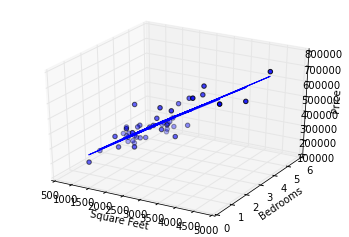

In [37]:
yHat = normalized_features_with_yintercept.dot(theta)

threedee = plt.figure().gca(projection='3d')
threedee.scatter(housing_data['square_footage'], housing_data['num_of_bedrooms'], housing_data['price'])
threedee.plot(housing_data['square_footage'], housing_data['num_of_bedrooms'], yHat.flatten())
threedee.set_xlabel('Square Feet')
threedee.set_ylabel('Bedrooms')
threedee.set_zlabel('Price')
plt.show()

Now let's make a price prediction given a 1650 square foot and 3 bedroom house!

In [13]:
# create the dataframe (we'll scale our new features in advance)
features = np.array([1.0, ((1650 - mean_of_features[0]) / std_deviation_of_features[0]), ((3 - mean_of_features[0]) / std_deviation_of_features[0])])
price_prediction = features.dot(theta)
print price_prediction

[ 308308.70589943]


There you have it! The predicted cost for a house like that would be around $308k. Pretty cool, huh?

If you'd like to build on this algorithm, we could increase speed of convergence by employing a method called "bold driver".

<h4> Bold Driver </h4>

If the error rate (i.e. MSE value) was reduced since the last iteration, increase the learning rate by 5%. If the error then increases after this, that means you skipped the global optimum and should reset the theta values to the previous iteraton and decrease the learning rate by 50%.

#Making Use of Libraries
So now that we know the how the underpinnings of linear regression work in both univariate and multivariate scenarios, we can safely use some good libraries out there that already do the code work - but now it's not a black box to us.

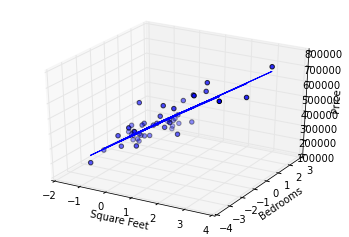

Theta:  [ 340412.65957447  110631.05027885   -6649.47427082]
P-Values:  [  6.24348183e-34   4.22227907e-12   5.74577895e-01]
R-Squared:  0.732945018029


In [60]:
%matplotlib inline
import pylab as pl
import numpy as np
import pandas as pd
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# import the cleaned up dataset
df = pd.read_csv('housingdata.csv')

price = df['price']
square_footage = df['square_footage']
num_of_bedrooms = df['num_of_bedrooms']

features = pd.DataFrame(housing_data[['square_footage', 'num_of_bedrooms']])

# normalize the data
features_norm = (features - features.mean()) / (features.std())
square_footage = features_norm['square_footage']
num_of_bedrooms = features_norm['num_of_bedrooms']

# reshape the data from a pandas Series to columns 
# the dependent variable
y = np.matrix(price).transpose()
# the independent variables shaped as columns
x1 = np.matrix(square_footage).transpose()
x2 = np.matrix(num_of_bedrooms).transpose()

# put the two columns together to create an input matrix 
# if we had n independent variables we would have n columns here
x = np.column_stack([x1,x2])

# create a linear model and fit it to the data
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

# make predictions on training and data and plot
theta = f.params[0:3].reshape(3, 1)
yHat = X.dot(theta)

threedee = plt.figure().gca(projection='3d')
threedee.scatter(square_footage, num_of_bedrooms, price)
threedee.plot(square_footage, num_of_bedrooms, yHat.flatten())
threedee.set_xlabel('Square Feet')
threedee.set_ylabel('Bedrooms')
threedee.set_zlabel('Price')
plt.show()

print 'Theta: ', f.params[0:3]
print 'P-Values: ', f.pvalues
print 'R-Squared: ', f.rsquared